In [26]:
# In a line plot, we plot the relationship between two quantitative variables one on each axis, using a line.
# The Y value of the line at any given X value reports the average value taken by the y-axis variable
# This is like a histogram with a variable - average instead of a count on the y-axis and point positions instead of bar heights
# Why lines instead of bars?
# Emphasize relative change
# Emphasize trends across x-values
# So, this means it is inappropriate to use a line plot if we have a nominal variable on the x-axis

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [28]:
# We need a function for summarizing a quantitative variable against a second quantitative variable
# such as with fuel efficiency by engine displacement
fuel_econ = pd.read_csv('./fuel_econ.csv')
fuel_econ.shape

(3929, 20)

In [29]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


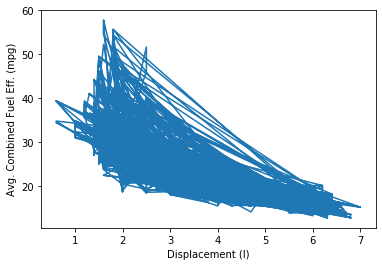

In [30]:
plt.errorbar(data=fuel_econ, x='displ', y='comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

In [60]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1] + 0.1
fuel_econ = fuel_econ.fillna(0)
displ = fuel_econ['displ'].astype(int)
displ_binned = pd.cut(displ, bins_e, include_lowest=True)
comb = fuel_econ['comb'].astype(int)
comb_mean = comb.groupby(displ_binned).mean()
comb_mean = comb_mean.fillna(0)
# comb_mean
comb_std = fuel_econ['comb'].groupby(displ_binned).std()
comb_std = comb_std.fillna(0)
comb_std

displ
(0.599, 0.8]    0.000000
(0.8, 1.0]      5.279543
(1.0, 1.2]      0.000000
(1.2, 1.4]      0.000000
(1.4, 1.6]      0.000000
(1.6, 1.8]      0.000000
(1.8, 2.0]      4.416788
(2.0, 2.2]      0.000000
(2.2, 2.4]      0.000000
(2.4, 2.6]      0.000000
(2.6, 2.8]      0.000000
(2.8, 3.0]      2.281937
(3.0, 3.2]      0.000000
(3.2, 3.4]      0.000000
(3.4, 3.6]      0.000000
(3.6, 3.8]      0.000000
(3.8, 4.0]      1.496679
(4.0, 4.2]      0.000000
(4.2, 4.4]      0.000000
(4.4, 4.6]      0.000000
(4.6, 4.8]      0.000000
(4.8, 5.0]      1.089795
(5.0, 5.2]      0.000000
(5.2, 5.4]      0.000000
(5.4, 5.6]      0.000000
(5.6, 5.8]      0.000000
(5.8, 6.0]      1.661403
(6.0, 6.2]      0.000000
(6.2, 6.4]      0.000000
(6.4, 6.6]      0.000000
(6.6, 6.8]      0.000000
(6.8, 7.0]      0.000000
Name: comb, dtype: float64

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

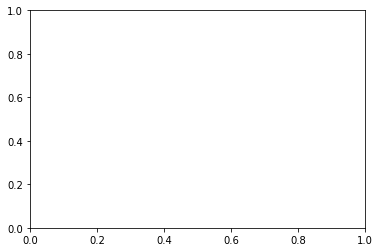

In [62]:
plt.errorbar(x=bins_c, y=comb_mean, yerr=comb_std);
plt.xlabel('Displacement (l)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');